In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, PrecisionRecallDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
df_train = pd.read_csv("../results/1410/X_train_dataset.csv")
df_val = pd.read_csv("../results/1410/X_val_dataset.csv")
df_test = pd.read_csv("../results/1410/X_test_dataset.csv")

In [3]:
y_train = df_train["label"].values
X_train = df_train.drop(columns=["label"]).values

y_val = df_val["label"].values
X_val = df_val.drop(columns=["label"]).values

y_test = df_test["label"].values
X_test = df_test.drop(columns=["label"]).values

In [4]:
rf_model = RandomForestClassifier(random_state=42)

In [11]:
scores = cross_val_score(rf_model, X_train, y_train, cv=10, n_jobs=-1, scoring="precision")
scores

array([0.74470899, 0.75206612, 0.77982955, 0.76900585, 0.78065395,
       0.75242047, 0.74013605, 0.74687065, 0.77717391, 0.76470588])

In [12]:
np.average(scores)

np.float64(0.7607571428539571)

In [13]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
predictions_validation = rf_model.predict(X_val)
predictions_testing = rf_model.predict(X_test)

In [15]:
precision_score(y_val, predictions_validation)

0.7497243660418964

In [16]:
precision_score(y_test, predictions_testing)

0.7603305785123967

In [36]:
data_proba_test = pd.DataFrame(data=rf_model.predict_proba(X_test), columns=["p_0", "p_1"])
data_proba_test["prediction"] = predictions_testing
data_proba_test["real_value"] = y_test
data_proba_test["prediction"] = data_proba_test["prediction"].astype(str)
data_proba_test["real_value"] = data_proba_test["real_value"].astype(str)
data_proba_test

,p_0,p_1,prediction,real_value
0,0.51,0.49,0,1
1,0.08,0.92,1,1
2,0.69,0.31,0,0
3,0.14,0.86,1,0
4,0.05,0.95,1,1
...,...,...,...,...
2117,0.75,0.25,0,1
2118,0.66,0.34,0,0
2119,0.65,0.35,0,0
2120,0.72,0.28,0,0


<Axes: xlabel='p_0', ylabel='real_value'>

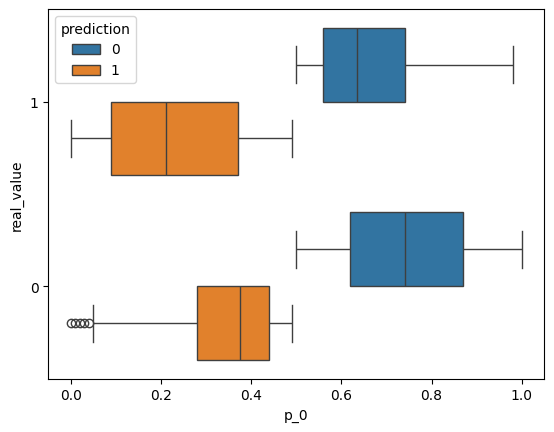

In [37]:
sns.boxplot(data=data_proba_test, x="p_0", hue="prediction", y="real_value")

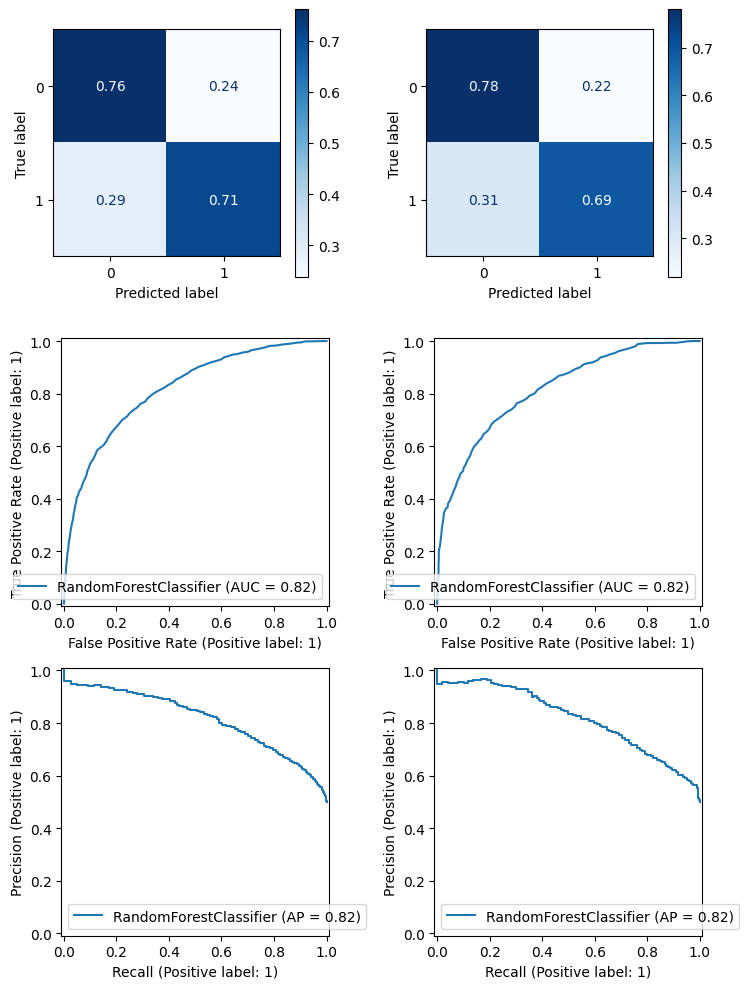

In [33]:
_, axis = plt.subplots(3,2, figsize=(8, 10))

ConfusionMatrixDisplay.from_estimator(
    estimator=rf_model,
    X=X_val,
    y=y_val,
    normalize="true",
    cmap="Blues",
    ax=axis[0][0]
)

ConfusionMatrixDisplay.from_estimator(
    estimator=rf_model,
    X=X_test,
    y=y_test,
    normalize="true",
    cmap="Blues",
    ax=axis[0][1]
)
RocCurveDisplay.from_estimator(
    estimator=rf_model,
    X=X_val,
    y=y_val,
    ax=axis[1][0]
)

RocCurveDisplay.from_estimator(
    estimator=rf_model,
    X=X_test,
    y=y_test,
    ax=axis[1][1]
)

PrecisionRecallDisplay.from_estimator(
    estimator=rf_model,
    X=X_val,
    y=y_val,
    ax=axis[2][0]
)
PrecisionRecallDisplay.from_estimator(
    estimator=rf_model,
    X=X_test,
    y=y_test,
    ax=axis[2][1]
)

plt.tight_layout()

In [ ]:
parameters = {
    n_estimators=100, 
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None
}